In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Height_Weight.csv")

In [3]:
df.head()

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      199 non-null    int64 
 1   gender  199 non-null    object
 2   weight  199 non-null    int64 
 3   height  199 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [5]:
df.isnull().sum()

id        0
gender    0
weight    0
height    0
dtype: int64

In [6]:
df.describe()

,id,weight,height
count,199.000000,199.000000,199.000000
mean,100.944724,65.195980,170.587940
std,57.681571,13.008031,8.948848
min,1.000000,39.000000,148.000000
25%,51.500000,55.000000,164.000000
50%,101.000000,63.000000,170.000000
75%,150.500000,73.500000,177.500000
max,200.000000,103.000000,197.000000


In [7]:
df.drop("id",axis=1,inplace=True)

In [8]:
df.head()

,gender,weight,height
0,F,39,157
1,F,43,154
2,F,44,157
3,F,45,163
4,F,45,157


In [9]:
df["gender"].value_counts()

gender
F    111
M     88
Name: count, dtype: int64

C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='weight', ylabel='height'>

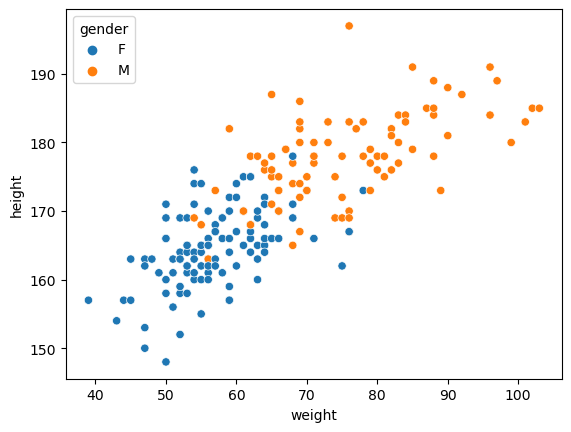

In [10]:
sns.scatterplot(x="weight",y="height",hue="gender",data=df)

height and weight are positively correlated , female height and weight are less than male

C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='height'>

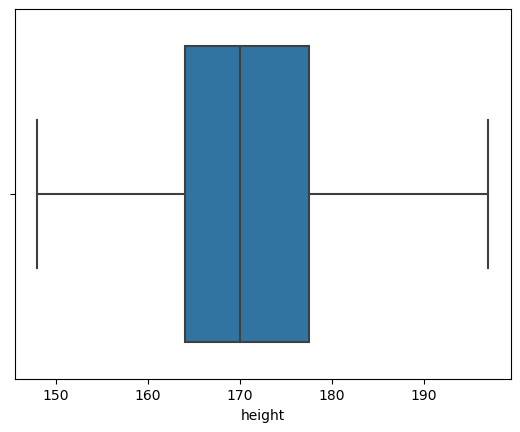

In [16]:
sns.boxplot(x=df["height"])

no uotliers in Height variable

<Axes: >

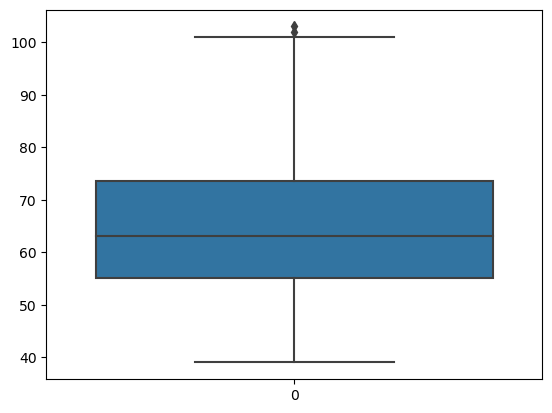

In [17]:
sns.boxplot(df["weight"])

there is outlier but not effect that much

In [18]:
df["height"].skew() #almost symmetric

0.2129090698591845

In [19]:
df["weight"].skew() # modaretly skew

0.7449402052268245

In [20]:
df.head()

,gender,weight,height
0,F,39,157
1,F,43,154
2,F,44,157
3,F,45,163
4,F,45,157


In [30]:
df["gender"]=pd.get_dummies(df["gender"],drop_first=True)

In [31]:
df

,gender,weight,height
0,False,39,157
1,False,43,154
2,False,44,157
3,False,45,163
4,False,45,157
...,...,...,...
194,True,97,189
195,True,101,183
196,True,102,185
197,True,103,185


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  199 non-null    bool 
 1   weight  199 non-null    int64
 2   height  199 non-null    int64
dtypes: bool(1), int64(2)
memory usage: 3.4 KB


<Axes: >

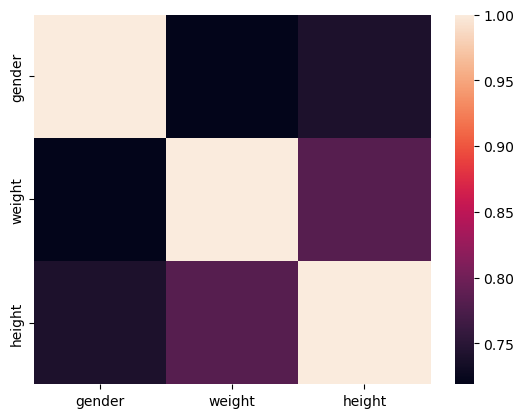

In [33]:
sns.heatmap(df.corr())

### Model Building

In [35]:
# splitting the data into IV and DV
X=df.drop("weight",axis=1)
y=df["weight"]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred=lr.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
r_squared=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)

In [47]:
print(f"r_Squared value:{r_squared}")
print(f"mean_squared_value:{mse}")
print(f"root_mean_squared_value:{np.sqrt(mse)}")

r_Squared value:0.464058269127104
mean_squared_value:49.9516692868136
root_mean_squared_value:7.067649488112267


In [56]:
result=pd.DataFrame({"actual_value":y_test,"predicted_value":y_pred})

In [50]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [51]:
xgb=GradientBoostingRegressor()

In [52]:
xgb.fit(X_train,y_train)

GradientBoostingRegressor()

In [59]:
y_pred=xgb.predict(X_test)

In [60]:
result["y_pred_xgb"]=y_pred

In [62]:
r_squared=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)

In [63]:
print(f"r_Squared value:{r_squared}")
print(f"mean_squared_value:{mse}")
print(f"root_mean_squared_value:{np.sqrt(mse)}")

r_Squared value:0.50309177627168
mean_squared_value:58.51888424401542
root_mean_squared_value:7.649763672429065


In [64]:
result

,actual_value,predicted_value,y_pred_xgb
82,60,55.601504,55.601504
15,50,58.542159,58.542159
111,65,69.194060,69.194060
177,83,71.199525,71.199525
76,59,58.916372,58.916372
...,...,...,...
31,53,56.847530,56.847530
12,50,61.608342,61.608342
35,53,51.024363,51.024363
115,65,73.381327,73.381327
